# Exercises 1

These are the exercises from [Chapter 1](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/leaky-integrate-and-fire.html)
of the book *Neuronal Dynamics*, Gerstner *et al.* (2014).

In [1]:
import brian2 as b2
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

nr of spikes: 0


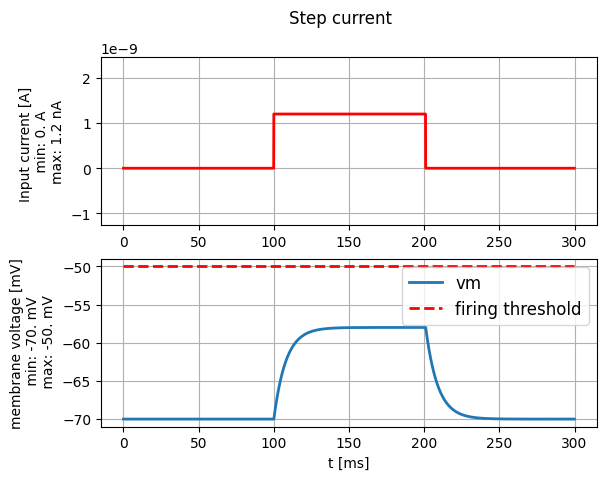

nr of spikes: 5


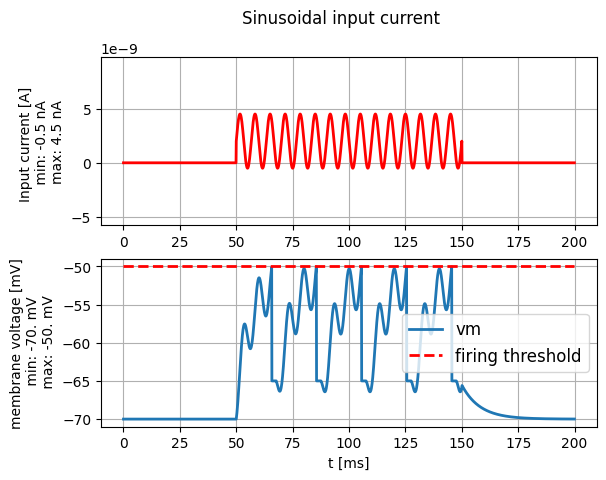

In [15]:
LIF.getting_started()

In [16]:
LIF.print_default_parameters()

Resting potential: -70. mV
Reset voltage: -65. mV
Firing threshold: -50. mV
Membrane resistance: 10. Mohm
Membrane time-scale: 8. ms
Absolute refractory period: 2. ms


We are able to change all of the parameters of the LIF neuron by using
the named parameters of the function `simulate_LIF_Neuron`. If we do not
simulate it, then the following default values are used
```py
V_REST = -70*b2.mV
V_RESET = -65*b2.mV
FIRING_THRESHOLD = -50*b2.mV
MEMBRANE_RESISTANCE = 10.0 * b2.Mohm
MEMBRANE_TIME_SCALE = 8. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms
```

# 1.1 Exercise: minimal current

In the absence of the input current, an LIF neuron has a constant membrane
voltage `V_REST`. If an input current drives `vm` above the firing threshold,
a spike is generated. Then, `vm` is rest to `V_RESET` and the neuron
ignores any input during the refractory period.

## 1.1.1 Question: minimal current

For the default neuron parameters, compute the minimal amplitude $I_\text{min}$
of a step current to elicit a spike. You can access the default values in 
your code to do the calculations with the correct units.

Recall, the trajectory of the membrane potential, where $u(0) = u_\text{rest}$,
the solution for $0 < t \Delta$, is:
$$
u (t) = u_\text{rest} + R I_0 \left[ 1 - \exp(- \frac{t}{\tau_m}) \right]
$$
We can solve $I_0$ when $u (t) = \vartheta$,
$$
\begin{align*}
    \vartheta &= u_\text{rest} + R I_0 \left [ 1 - \exp (- \frac{t}{\tau_m}) \right] \\
    \vartheta - u_\text{rest} &= R I_0 \left[ 1 - \exp(- \frac{t}{\tau_m}) \right] \\
    \frac{\vartheta - u_\text{rest}}{R \left[ 1 - \exp (-\frac{t}{\tau_m}) \right]} &= I_0
\end{align*}
$$

In [59]:
print(f"resting potential: {LIF.V_REST}")

I_min = ((LIF.FIRING_THRESHOLD - LIF.V_REST) / LIF.MEMBRANE_RESISTANCE * \
    (1-np.exp(- (100 * b2.ms) / LIF.MEMBRANE_TIME_SCALE)))

print(f"minimal amplitude: {I_min}")

resting potential: -70. mV
minimal amplitude: 1.99999255 nA


## 1.1.2 Question: minimal current

Use the $I_\text{min}$ that we've computed above to verify the result: inject
a step current of amplitude $I_\text{min}$ for $100$ ms into the LIF neuron,
and plot the membrane voltage. `vm` should approach the firing threshold
but **not** fire. The library has implemented a couple of helper functions
to solve the task.

nr of spikes (should be equal 0): 0


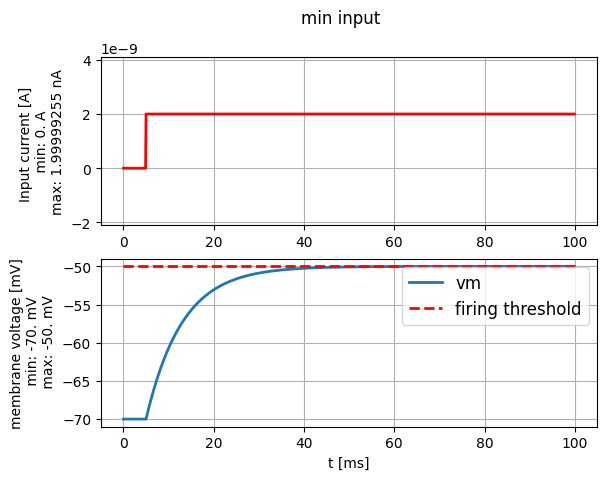

In [60]:
# Create the step current with amplitude = I_min
step_current = input_factory.get_step_current(
    t_start=5,
    t_end=100,
    unit_time=b2.ms,
    amplitude=I_min,
)

# run the LIF model
state_monitor, spike_monitor = LIF.simulate_LIF_neuron(
    input_current=step_current,
    simulation_time=100 * b2.ms
)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
    state_monitor,
    step_current,
    title="min input",
    firing_threshold=LIF.FIRING_THRESHOLD,
)
print(f"nr of spikes (should be equal 0): {spike_monitor.count[0]}")

# Exercise 1.2: f-I Curve